In [21]:
#Author: Muhammed Talha ZAVALSIZ

#Date : 30.10.2022

# Machine Learning Homework 1 - Multinomial Naive Bayes

# **Question 2.1. Class Distribution**

In [22]:
import numpy as np
import pandas as pd
!pip install matplotlib
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from google.colab import files
uploaded = files.upload()

Saving bbcsports_train.csv to bbcsports_train (3).csv
Saving bbcsports_val.csv to bbcsports_val (3).csv


In [26]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['bbcsports_train.csv']))
df2 = pd.read_csv(io.BytesIO(uploaded['bbcsports_val.csv']))

In [27]:
from numpy import genfromtxt
my_data = genfromtxt('bbcsports_train.csv', delimiter=',')
my_data2 = genfromtxt('bbcsports_val.csv',delimiter=',')

#Below, i preprocess the data to only get the labels of validation set and training set.

train_label = my_data[:,-1:]

validation_label = my_data2[:,-1:]

train_label = train_label[1:,:]

validation_label = validation_label[1:,:]



In [28]:
df1['class_label'].value_counts()

2    198
3    114
1     86
4     77
0     77
Name: class_label, dtype: int64

In [29]:
df2['class_label'].value_counts()

2    67
1    38
3    33
0    24
4    23
Name: class_label, dtype: int64

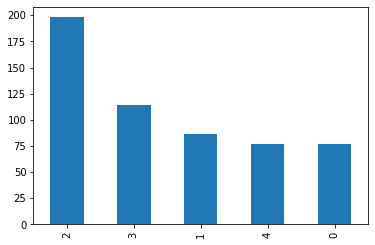

In [30]:
df1['class_label'].value_counts().plot.bar()

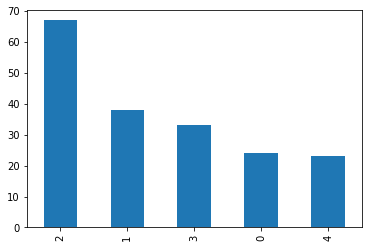

In [31]:
df2['class_label'].value_counts().plot.bar()

# **QUESTION 2.3. Naive Bayes Implementation without Smoothing**

In [32]:
#Preprocess the data features for implementation.
train_features = my_data[:,:-1]
validation_features = my_data2[:,:-1]

train_label = my_data[:,-1:]

train_features = my_data[:,:-1]

validation_label = my_data2[:,-1:]

validation_features = my_data2[:,:-1]


In [33]:
train_label = np.delete(train_label, 0, axis=0) # This was needed for the extracting the row of the train label since these were the vocabularies, which will not be used.


train_features = np.delete(train_features, 0, axis=0) # Training dataset preprocessing is done, 
#we can see that we have 552 row for features and shape. 1 row for labels, 4613 row for features

# The below code is returning the output of the priors for each class. There are 5 classes (class0,class1,class2,class3,class4)

def prior():
  

  for outcome in np.unique(train_label):

    outcome_count = 0

    outcome_count = sum(train_label == outcome) 

    outcome = outcome_count / len(train_label)

    print(outcome)

prior()

[0.13949275]
[0.1557971]
[0.35869565]
[0.20652174]
[0.13949275]


In [34]:
my_data_del = np.delete(my_data, 0, 0)

my_data_del

class_num = 5
word_claass_count = np.zeros((my_data_del.shape[1]-1, class_num))
word_claass_count_prob = np.zeros((my_data_del.shape[1]-1, class_num))
count_all = 0
for i in range(word_claass_count.shape[1]):
  my_data_class = my_data_del[my_data_del[:,-1]==i]
  class_count = np.sum(my_data_class)
  count_all += class_count
  print(class_count)
  for j in range(word_claass_count.shape[0]):
    count = np.sum(my_data_class[:,j])
    word_claass_count[j,i] = count
    word_claass_count_prob[j,i] = np.round(count/class_count, 4)

    if word_claass_count_prob[j,i] != 0:

      word_claass_count_prob[j,i] = np.log(word_claass_count_prob[j,i])

prior0 = 0.13949275
prior1 = 0.1557971
prior2 = 0.35869565
prior3 = 0.20652174
prior4 = 0.13949275

11572.0
17265.0
31929.0
21097.0
11127.0


In [35]:
numFeatures = len(train_features[0])

matrixLikelihood0 = np.zeros(numFeatures)
matrixLikelihood1 = np.zeros(numFeatures)
matrixLikelihood2 = np.zeros(numFeatures)
matrixLikelihood3 = np.zeros(numFeatures)
matrixLikelihood4 = np.zeros(numFeatures)

matrixLikelihood0 = word_claass_count_prob[:,0] # returns the first columm

matrixLikelihood1 = word_claass_count_prob[:,1] # returns the second columm

print(matrixLikelihood1)

matrixLikelihood2 = word_claass_count_prob[:,2] # returns the third columm

print(matrixLikelihood2)

matrixLikelihood3 = word_claass_count_prob[:,3] # returns the fourth columm

print(matrixLikelihood3)

matrixLikelihood4 = word_claass_count_prob[:,4] # returns the fifth columm

print(matrixLikelihood4)

b0 = []

b1 = []

b2 = []

b3 = []

b4 = []


for i in matrixLikelihood0:
  
  b0.append(i)

for i in matrixLikelihood1:
  
  b1.append(i)

for i in matrixLikelihood2:
  
  b2.append(i)

for i in matrixLikelihood3:
  
  b3.append(i)

for i in matrixLikelihood4:
  
  b4.append(i)


for i in range(len(b0)):
    x = b0[i]
    if x == 0:
       b0[i] = b0[i] + (-999999999999999999)


for i in range(len(b1)):
    x = b1[i]
    if x == 0:
       b1[i] = b1[i] + (-999999999999999999)


for i in range(len(b2)):
    x = b2[i]
    if x == 0:
       b2[i] = b2[i] + (-999999999999999999)


for i in range(len(b3)):
    x = b3[i]
    if x == 0:
       b3[i] = b3[i] + (-999999999999999999)


for i in range(len(b4)):
    x = b4[i]
    if x == 0:
       b4[i] = b4[i] + (-999999999999999999)


arr = []

for i in range(len(validation_features)):
  posterior0 = float(0) + np.log(prior0)
  posterior1 = float(0) + np.log(prior1)
  posterior2 = float(0) + np.log(prior2)
  posterior3 = float(0) + np.log(prior3)
  posterior4 = float(0) + np.log(prior4)

  
  for j in range(numFeatures):
    
    posterior0 = posterior0 + float(b0[j] * validation_features[i][j]) 
    posterior1 = posterior1 + float(b1[j] * validation_features[i][j])
    posterior2 = posterior2 + float(b2[j] * validation_features[i][j])
    posterior3 = posterior3 + float(b3[j] * validation_features[i][j])
    posterior4 = posterior4 + float(b4[j] * validation_features[i][j])
    
  
  if posterior0 > (posterior1 and posterior2 and posterior3 and posterior4):
    arr.append(0)

  elif posterior1 > (posterior0 and posterior2 and posterior3 and posterior4):
    arr.append(1)

  elif posterior2 > (posterior1 and posterior0 and posterior3 and posterior4):
    arr.append(2)

  elif posterior3 > (posterior1 and posterior2 and posterior0 and posterior4):
    arr.append(3)
    
  elif posterior4 > (posterior1 and posterior2 and posterior3 and posterior0):
    arr.append(4)

[ 0.         -8.51719319 -4.80362112 ...  0.          0.
  0.        ]
[ 0.         -9.21034037 -5.57275421 ...  0.          0.
  0.        ]
[ 0.          0.         -5.13280293 ...  0.          0.
  0.        ]
[ 0.          0.         -4.68855179 ... -8.11172808 -8.11172808
 -8.11172808]


In [36]:
validation_label2 = validation_label[:,-1:]
validation_label3 = np.delete(validation_label2, 0, 0)
validation_label3 = validation_label3.astype(int)

val_labels = validation_label3.reshape(-1)
arr_labels = np.asarray(arr).reshape(-1)


print(val_labels)
print(arr_labels)
print(val_labels==arr_labels)
print(np.sum(val_labels==arr_labels))


[4 2 1 2 4 0 0 1 2 2 1 3 1 1 0 3 1 2 3 3 3 1 2 1 3 2 3 4 3 2 3 2 1 1 3 2 2
 1 2 1 2 0 1 4 3 4 4 4 2 2 2 4 2 4 0 1 0 1 2 4 0 4 2 0 3 2 1 0 2 3 0 4 0 0
 3 1 2 2 4 2 2 2 2 2 1 4 2 2 4 0 1 0 2 4 3 2 1 1 0 1 2 2 2 1 2 1 1 1 1 3 2
 1 4 0 3 2 2 3 2 2 1 3 0 1 2 2 2 3 1 1 4 2 1 3 4 3 1 2 2 3 2 3 2 2 4 3 0 2
 3 4 3 3 3 2 1 2 0 2 2 2 0 3 2 2 3 2 2 1 2 0 3 1 1 2 0 0 4 2 2 3 2 0 4 2 2]
[4 0 1 0 4 0 0 0 0 2 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 2 4 0 1 0 0 0 1 0 0 0
 1 0 1 2 0 1 4 1 4 4 4 0 0 2 4 1 4 0 1 0 1 0 4 0 0 2 0 0 2 0 0 2 0 0 4 0 0
 0 1 1 2 4 0 0 0 0 0 1 4 0 2 4 0 0 0 0 4 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 1 4 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 4 0 1 0 4 0 0 0 1 0 0 0 0 1 4 0 0 1
 0 4 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 1 0 2 0 0 4 0 0 0 1 0 4 0 0]
[ True False  True False  True  True  True False False  True  True False
 False False  True False  True False False False False False False False
 False False False  True False False False False False  True False False
 False  True False  True  Tru

In [37]:
def plot_conf(actual, predicted):

   
    class_number = np.unique(actual)
    confusion = np.zeros((5, 5))

    for i in range(len(class_number)):
        for j in range(len(class_number)):
           confusion[i, j] = np.sum((actual == class_number[i]) & (predicted == class_number[j]))

    return confusion

plot_conf(val_labels,arr_labels)

array([[24.,  0.,  0.,  0.,  0.],
       [15., 23.,  0.,  0.,  0.],
       [46., 11., 10.,  0.,  0.],
       [30.,  2.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0., 22.]])

In [38]:
a = (np.sum(val_labels==arr_labels))

b = len(validation_label3) 


acc = (a / b) * 100

print(f'Accuracy is {acc}')

print(f'Number of false predictions are {b-a}')

Accuracy is 42.7027027027027
Number of false predictions are 106


## `**QUESTION 2.3. Naive Bayes Implementation with Smoothing**`

In [39]:
my_data_del = np.delete(my_data, 0, 0)

class_num = 5

word_claass_count = np.zeros((my_data_del.shape[1]-1, class_num)) 
word_claass_count_prob = np.zeros((my_data_del.shape[1]-1, class_num))
count_all = 0
for i in range(word_claass_count.shape[1]):
  my_data_class = my_data_del[my_data_del[:,-1]==i]
  class_count = np.sum(my_data_class)
  count_all += class_count
  print(class_count)
  for j in range(word_claass_count.shape[0]):
    count = np.sum(my_data_class[:,j])
    word_claass_count[j,i] = count + 1
    word_claass_count_prob[j,i] = (word_claass_count[j,i])/(class_count + len(train_features[0]))
    
    if word_claass_count_prob[j,i] != 0:

      word_claass_count_prob[j,i] = np.log(word_claass_count_prob[j,i])

prior0 = 0.13949275
prior1 = 0.1557971
prior2 = 0.35869565
prior3 = 0.20652174
prior4 = 0.13949275

11572.0
17265.0
31929.0
21097.0
11127.0


In [40]:
validation_label1 = np.delete(validation_label, 0, 0)
train_features = np.delete(train_features, 0, axis=0)



In [41]:
numFeatures = len(train_features[0])

matrixLikelihood0 = np.zeros(numFeatures)
matrixLikelihood1 = np.zeros(numFeatures)
matrixLikelihood2 = np.zeros(numFeatures)
matrixLikelihood3 = np.zeros(numFeatures)
matrixLikelihood4 = np.zeros(numFeatures)

matrixLikelihood0 = word_claass_count_prob[:,0] # returns the first columm

print(matrixLikelihood0)

matrixLikelihood1 = word_claass_count_prob[:,1] # returns the second columm

print(matrixLikelihood1)

matrixLikelihood2 = word_claass_count_prob[:,2] # returns the third columm

print(matrixLikelihood2)

matrixLikelihood3 = word_claass_count_prob[:,3] # returns the fourth columm

print(matrixLikelihood3)

matrixLikelihood4 = word_claass_count_prob[:,4] # returns the fifth columm

print(matrixLikelihood4)


arr = []

for i in range(len(validation_features)):
  posterior0 = float(0) + np.log(prior0)
  posterior1 = float(0) + np.log(prior1)
  posterior2 = float(0) + np.log(prior2)
  posterior3 = float(0) + np.log(prior3)
  posterior4 = float(0) + np.log(prior4)

  
  for j in range(numFeatures):

  
    
    posterior0 = posterior0 + float(matrixLikelihood0[j] * validation_features[i][j]) 
    posterior1 = posterior1 + float(matrixLikelihood1[j] * validation_features[i][j])
    posterior2 = posterior2 + float(matrixLikelihood2[j] * validation_features[i][j])
    posterior3 = posterior3 + float(matrixLikelihood3[j] * validation_features[i][j])
    posterior4 = posterior4 + float(matrixLikelihood4[j] * validation_features[i][j])
    
  
  if posterior0 > (posterior1 and posterior2 and posterior3 and posterior4):

    arr.append(0)

  elif posterior1 > (posterior0 and posterior2 and posterior3 and posterior4):

   
    arr.append(1)

  elif posterior2 > (posterior1 and posterior0 and posterior3 and posterior4):
    
    arr.append(2)

  elif posterior3 > (posterior1 and posterior2 and posterior0 and posterior4):

    
    arr.append(3)
    

  elif posterior4 > (posterior1 and posterior2 and posterior3 and posterior0):

    arr.append(4)
    

[-7.29394489 -8.99869299 -6.05425401 ... -9.69184017 -9.69184017
 -9.69184017]
[-9.99323684 -8.38379893 -5.03740979 ... -9.99323684 -9.99323684
 -9.99323684]
[-10.50621756  -9.40760527  -5.69403321 ... -10.50621756 -10.50621756
 -10.50621756]
[-10.1546353  -10.1546353   -5.32632156 ... -10.1546353  -10.1546353
 -10.1546353 ]
[-9.66396052 -9.66396052 -5.02923153 ... -8.27766616 -8.27766616
 -8.27766616]


In [42]:
validation_label_1 = validation_label[:,-1:]
validation_label_3 = np.delete(validation_label_1, 0, 0)
validation_label_3 = validation_label_3.astype(int)

val_labels_1 = validation_label_3.reshape(-1)
arr_labels_1 = np.asarray(arr).reshape(-1)
print(val_labels_1.shape)
print(arr_labels_1.shape)

print(val_labels_1)
print(arr_labels_1)
print(val_labels_1==arr_labels_1)
print(np.sum(val_labels_1==arr_labels_1))

(185,)
(185,)
[4 2 1 2 4 0 0 1 2 2 1 3 1 1 0 3 1 2 3 3 3 1 2 1 3 2 3 4 3 2 3 2 1 1 3 2 2
 1 2 1 2 0 1 4 3 4 4 4 2 2 2 4 2 4 0 1 0 1 2 4 0 4 2 0 3 2 1 0 2 3 0 4 0 0
 3 1 2 2 4 2 2 2 2 2 1 4 2 2 4 0 1 0 2 4 3 2 1 1 0 1 2 2 2 1 2 1 1 1 1 3 2
 1 4 0 3 2 2 3 2 2 1 3 0 1 2 2 2 3 1 1 4 2 1 3 4 3 1 2 2 3 2 3 2 2 4 3 0 2
 3 4 3 3 3 2 1 2 0 2 2 2 0 3 2 2 3 2 2 1 2 0 3 1 1 2 0 0 4 2 2 3 2 0 4 2 2]
[4 2 1 0 4 0 0 1 2 2 1 2 1 0 0 1 1 0 2 0 2 1 2 0 2 2 2 4 3 2 0 2 0 1 1 2 2
 1 0 1 2 0 1 4 3 4 4 4 2 0 2 4 2 4 0 1 0 1 2 4 0 0 2 0 1 2 0 0 2 1 0 4 0 0
 0 1 2 2 4 0 2 0 2 0 1 4 2 2 4 0 0 0 2 4 0 0 1 1 0 0 0 2 2 0 0 1 1 1 1 3 2
 1 4 0 0 0 2 1 2 2 0 0 0 1 2 2 2 2 1 0 4 0 1 1 4 0 1 2 2 0 0 0 2 2 4 1 0 2
 2 4 3 3 1 2 1 2 0 2 2 0 0 1 1 0 0 0 0 1 2 0 0 1 1 2 0 0 4 0 0 0 2 0 4 2 1]
[ True  True  True False  True  True  True  True  True  True  True False
  True False  True False  True False False False False  True  True False
 False  True False  True  True  True False  True False  True False  True
  True  True Fa

In [43]:
def plot_conf(actual, predicted):

   
    class_number = np.unique(actual)
    confusion = np.zeros((5, 5))

    for i in range(len(class_number)):
        for j in range(len(class_number)):
           confusion[i, j] = np.sum((actual == class_number[i]) & (predicted == class_number[j]))

    return confusion

plot_conf(val_labels_1,arr_labels_1)

array([[24.,  0.,  0.,  0.,  0.],
       [ 9., 29.,  0.,  0.,  0.],
       [19.,  2., 46.,  0.,  0.],
       [12.,  9.,  7.,  5.,  0.],
       [ 1.,  0.,  0.,  0., 22.]])

In [44]:
a = (np.sum(val_labels_1==arr_labels_1))

b = len(validation_label3) 

print(len(validation_label3))

acc = (a / b) * 100

print(f'Accuracy is {acc}')

print(f'Number of false predictions are {b-a}')

185
Accuracy is 68.10810810810811
Number of false predictions are 59
